# Predicting Delivery time based on different parameters


### About the dataset  
Link : https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction  
##### Food Delivery Time Prediction Dataset Description  

This dataset provides various features related to food delivery times, aiming to help analyze and predict the estimated delivery duration. Below are the details of each column:

- **Delivery_person_ID**: Unique identifier for each delivery person.
- **Order_ID**: Unique identifier for each order.
- **Distance_km**: The delivery distance in kilometers.
- **Weather**: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.
- **Traffic_Level**: Traffic conditions categorized as Low, Medium, or High.
- **Time_of_Day**: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.
- **Vehicle_Type**: Type of vehicle used for delivery, including Bike, Scooter, and Car.
- **Preparation_Time_min**: The time required to prepare the order, measured in minutes.
- **Courier_Experience_yrs**: Experience of the courier in years.
- **Delivery_Time_min**: The total delivery time in minutes (target variable).

This dataset can be useful for building predictive models to estimate delivery times based on various factors such as traffic, weather, and order details.

## Step 1: Pre-porcessing

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [190]:
df = pd.read_csv("Food_Delivery_Dataset.csv")

In [191]:
df.drop(columns=["Order_ID"], inplace=True)

In [219]:
skew_values = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].skew()
print(skew_values)

Distance_km               0.038840
Preparation_Time_min      0.030008
Courier_Experience_yrs   -0.029532
Delivery_Time_min         0.507251
dtype: float64


In [192]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [193]:
df.tail()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,8.50,Clear,High,Evening,Car,13,3.0,54
996,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [194]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [195]:
df.shape

(1000, 8)

In [196]:
cat_features = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]
num_features = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]

In [197]:
for col in cat_features:
    comparison_table = df.groupby(col)['Delivery_Time_min'].agg(['count']).reset_index()
    comparison_table.columns = [col, 'count']
    print(f"\nComparative Analysis for '{col}':")
    print(comparison_table)


Comparative Analysis for 'Weather':
  Weather  count
0   Clear    470
1   Foggy    103
2   Rainy    204
3   Snowy     97
4   Windy     96

Comparative Analysis for 'Traffic_Level':
  Traffic_Level  count
0          High    197
1           Low    383
2        Medium    390

Comparative Analysis for 'Time_of_Day':
  Time_of_Day  count
0   Afternoon    284
1     Evening    293
2     Morning    308
3       Night     85

Comparative Analysis for 'Vehicle_Type':
  Vehicle_Type  count
0         Bike    503
1          Car    195
2      Scooter    302


In [198]:
df[num_features] = df[num_features].fillna(df[num_features].mean())
df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])

In [199]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [200]:
df.shape

(1000, 8)

In [201]:

weather_mapping = {"Clear": 0, "Foggy": 1, "Rainy": 2, "Snowy": 3, "Windy": 4}
traffic_mapping = {"Low": 0, "Medium": 1, "High": 2}
time_mapping = {"Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3}
vehicle_mapping = {"Bike": 0, "Scooter": 1, "Car": 2}

df["Weather"] = df["Weather"].map(weather_mapping)
df["Traffic_Level"] = df["Traffic_Level"].map(traffic_mapping)
df["Time_of_Day"] = df["Time_of_Day"].map(time_mapping)
df["Vehicle_Type"] = df["Vehicle_Type"].map(vehicle_mapping)

In [202]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,4,0,1,1,12,1.0,43
1,16.42,0,1,2,0,20,2.0,84
2,9.52,1,0,3,1,28,1.0,59
3,7.44,2,1,1,1,5,1.0,37
4,19.03,0,0,0,0,16,5.0,68


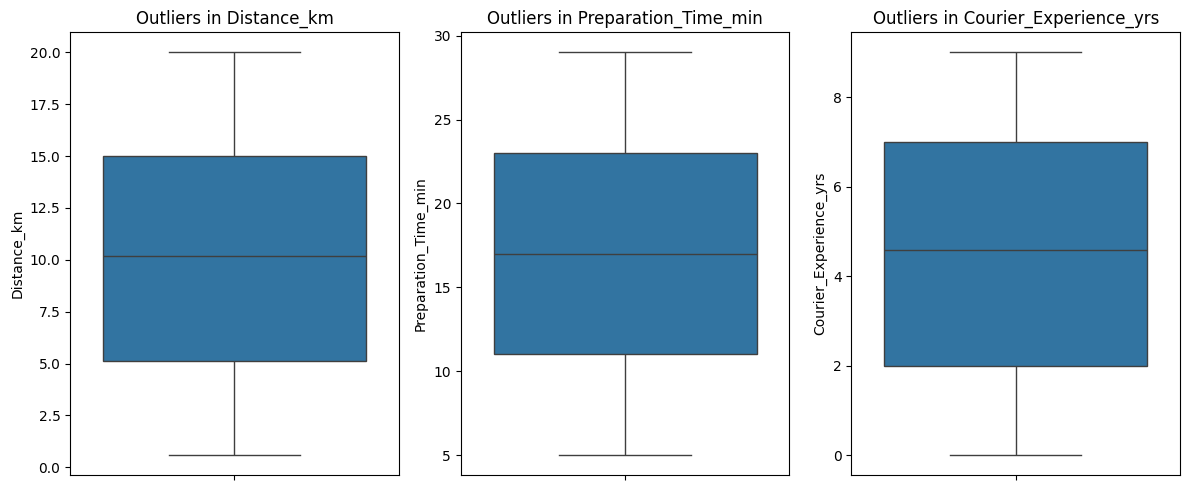

In [203]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Outliers in {col}")

plt.tight_layout()
plt.show()

## Assumption 1 : Linearity check 

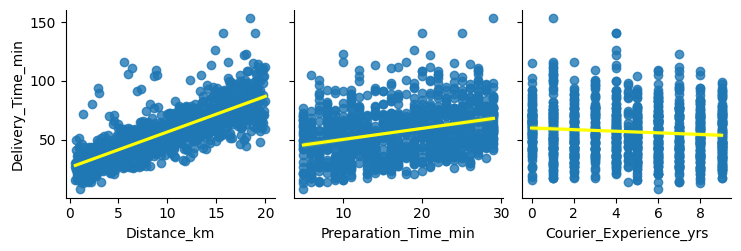

In [204]:
sns.pairplot(df, x_vars=['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'], y_vars='Delivery_Time_min', kind='reg',plot_kws={'line_kws': {'color': 'yellow'}})
plt.show()

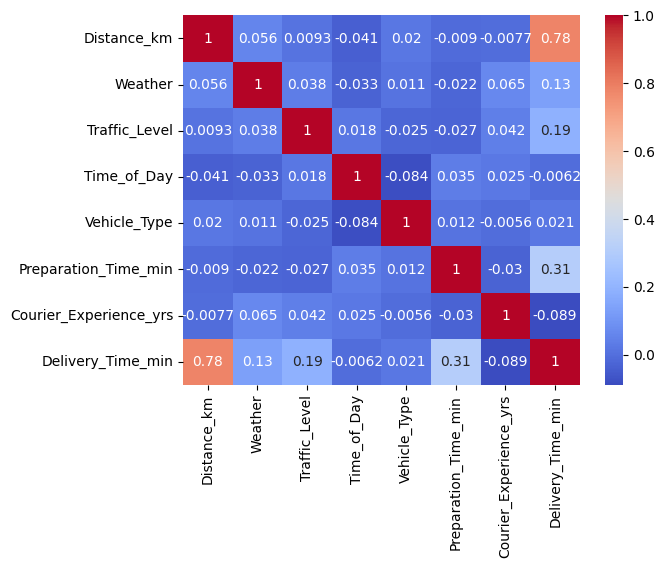

In [205]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Assumption 2 : Multicollinearity Check (VIF Test) 

In [206]:
X = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs',"Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                  Feature       VIF
0             Distance_km  3.341987
1    Preparation_Time_min  4.242295
2  Courier_Experience_yrs  3.039329
3                 Weather  1.698736
4           Traffic_Level  2.072561
5             Time_of_Day  2.152661
6            Vehicle_Type  1.708954


## Assumption 3: Homoscedasticity Check

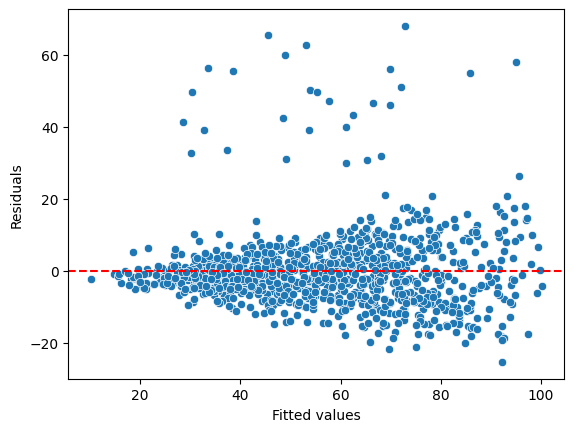

In [207]:
import statsmodels.api as sm
X = sm.add_constant(X)  # Add constant for regression
model = sm.OLS(df['Delivery_Time_min'], X).fit()
residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [208]:
df2=df.copy()
df2['Delivery_Time_min'] = np.log(df2['Delivery_Time_min'])

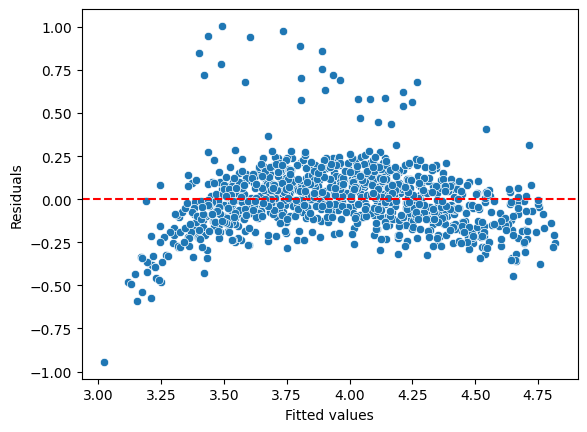

In [209]:
X = sm.add_constant(X)  # Add constant for regression
model = sm.OLS(df2['Delivery_Time_min'], X).fit()
residuals = model.resid

sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


## Assumption 4 : Durbin-Watson test

In [210]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_test}')


Durbin-Watson statistic: 2.0075369541681964


## Step 2: Model Training

In [211]:
X = df.drop(columns=["Delivery_Time_min"])
y = df["Delivery_Time_min"]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#num_features_sel = ["Distance_km", "Preparation_Time_min"]

In [213]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [214]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [215]:
y_pred = model.predict(X_test)

In [216]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 6.409567456930308
Mean Squared Error (MSE): 86.59952495732139
Root Mean Squared Error (RMSE): 9.305886575567177
R² Score: 0.806795374246895


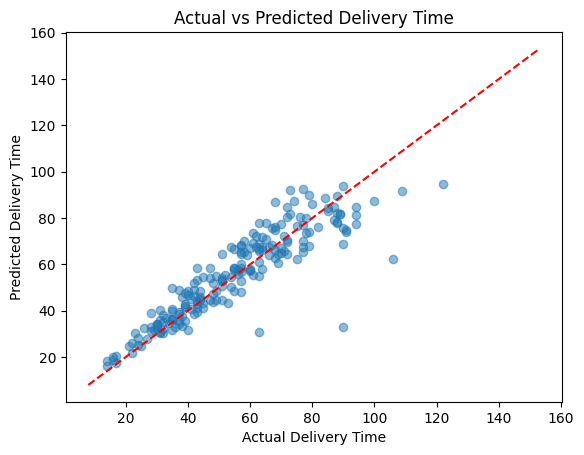

In [217]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()

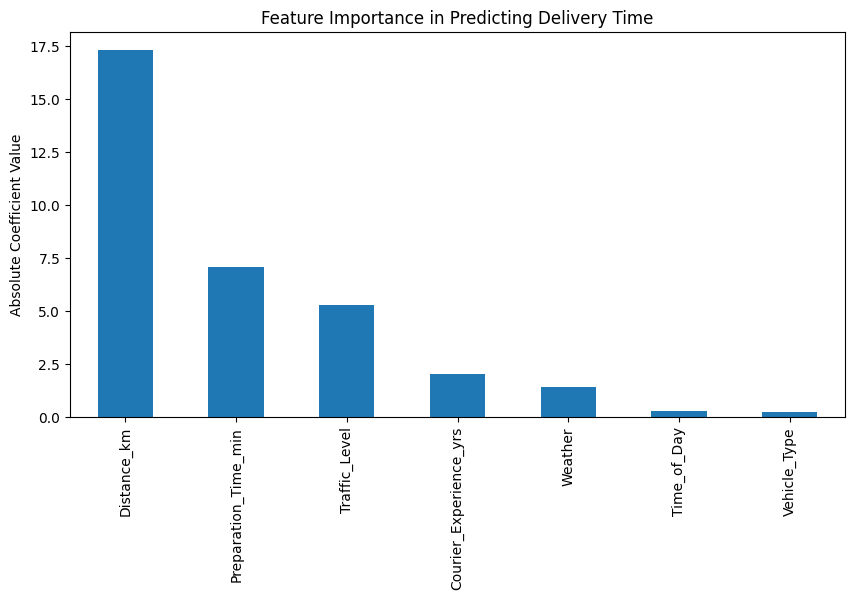

In [218]:
feature_importance = pd.Series(abs(model.coef_), index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance in Predicting Delivery Time")
plt.ylabel("Absolute Coefficient Value")
plt.show()


### Conclusion 

- In the **scatter plot**, most points follow an **upward trend**, meaning that as the **actual delivery time increases, the predicted time also increases**.  
- The **red dashed line (ideal fit line)** further supports this, as a **strong positive correlation** would align points closely along this diagonal.  
- The **R² score of 0.807** indicates that the model captures a significant portion of this positive relationship.  